# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In this lab, we will explore a dataset that describes websites with different features and labels them either benign or malicious . We will use supervised learning algorithms to figure out what feature patterns malicious websites are likely to have and use our model to predict malicious websites.

# Challenge 1 - Explore The Dataset

Let's start by exploring the dataset. First load the data file:

In [2]:
websites = pd.read_csv(r"C:\Users\Shinemet\Ironhack\Labs\Module3\4. Supervised-Learning\website.csv")

#### Explore the data from an bird's-eye view.

You should already been very familiar with the procedures now so we won't provide the instructions step by step. Reflect on what you did in the previous labs and explore the dataset.

Things you'll be looking for:

* What the dataset looks like?
* What are the data types?
* Which columns contain the features of the websites?
* Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
* Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

Feel free to add additional cells for your explorations. Make sure to comment what you find out.

In [3]:
# Your code here
websites

URL  URL_LENGTH  NUMBER_SPECIAL_CHARACTERS     CHARSET  \
0      M0_109          16                          7  iso-8859-1   
1     B0_2314          16                          6       UTF-8   
2      B0_911          16                          6    us-ascii   
3      B0_113          17                          6  ISO-8859-1   
4      B0_403          17                          6       UTF-8   
...       ...         ...                        ...         ...   
1776    M4_48         194                         16       UTF-8   
1777    M4_41         198                         17       UTF-8   
1778   B0_162         201                         34       utf-8   
1779  B0_1152         234                         34  ISO-8859-1   
1780   B0_676         249                         40       utf-8   

                      SERVER  CONTENT_LENGTH WHOIS_COUNTRY WHOIS_STATEPRO  \
0                      nginx           263.0          None           None   
1              Apache/2.4.10         15087.0          None           None   
2      Microsoft-HTTPAPI/2.0           324.0          None           None   
3                      nginx           162.0            US             AK   
4                       None        124140.0            US             TX   
...                      ...             ...           ...            ...   
1776                  Apache             NaN            ES      Barcelona   
1777                  Apache             NaN            ES      Barcelona   
1778  Apache/2.2.16 (Debian)          8904.0            US             FL   
1779        cloudflare-nginx             NaN            US             CA   
1780       Microsoft-IIS/8.5         24435.0            US      Wisconsin   

         WHOIS_REGDATE WHOIS_UPDATED_DATE  ...  DIST_REMOTE_TCP_PORT  \
0     10/10/2015 18:21               None  ...                     0   
1                 None               None  ...                     7   
2                 None               None  ...                     0   
3       7/10/1997 4:00    12/09/2013 0:45  ...                    22   
4      12/05/1996 0:00    11/04/2017 0:00  ...                     2   
...                ...                ...  ...                   ...   
1776   17/09/2008 0:00     2/09/2016 0:00  ...                     0   
1777   17/09/2008 0:00     2/09/2016 0:00  ...                     0   
1778   15/02/1999 0:00    15/07/2015 0:00  ...                     2   
1779    1/04/1998 0:00     9/12/2016 0:00  ...                     0   
1780   14/11/2008 0:00    20/11/2013 0:00  ...                     6   

      REMOTE_IPS  APP_BYTES  SOURCE_APP_PACKETS  REMOTE_APP_PACKETS  \
0              2        700                   9                  10   
1              4       1230                  17                  19   
2              0          0                   0                   0   
3              3       3812                  39                  37   
4              5       4278                  61                  62   
...          ...        ...                 ...                 ...   
1776           0          0                   0                   3   
1777           0          0                   0                   2   
1778           6       6631                  87                  89   
1779           0          0                   0                   0   
1780          11       2314                  25                  28   

      SOURCE_APP_BYTES  REMOTE_APP_BYTES  APP_PACKETS  DNS_QUERY_TIMES  Type  
0                 1153               832            9              2.0     1  
1                 1265              1230           17              0.0     0  
2                    0                 0            0              0.0     0  
3                18784              4380           39              8.0     0  
4               129889              4586           61              4.0     0  
...                ...               ...          ...              ...   ...

In [4]:
# Your comment here
websites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        1781 non-null   object 
 1   URL_LENGTH                 1781 non-null   int64  
 2   NUMBER_SPECIAL_CHARACTERS  1781 non-null   int64  
 3   CHARSET                    1781 non-null   object 
 4   SERVER                     1780 non-null   object 
 5   CONTENT_LENGTH             969 non-null    float64
 6   WHOIS_COUNTRY              1781 non-null   object 
 7   WHOIS_STATEPRO             1781 non-null   object 
 8   WHOIS_REGDATE              1781 non-null   object 
 9   WHOIS_UPDATED_DATE         1781 non-null   object 
 10  TCP_CONVERSATION_EXCHANGE  1781 non-null   int64  
 11  DIST_REMOTE_TCP_PORT       1781 non-null   int64  
 12  REMOTE_IPS                 1781 non-null   int64  
 13  APP_BYTES                  1781 non-null   int64

In [5]:
websites['URL'].nunique()

1781

*Features of the website are contained in columns 0 to 19, predicted feature is in column 20: 
with 0 benign and 1 malicious as malicious is the target feature here.
We also have categorical values to encode to compute correlation and calculations:*
- URL has only unique values so there is no point encoding it, these are unique identifiers
- CHARSET, SERVER, WHOIS_COUNTRY, WHOIS_STATEPRO, WHOIS_REGDATE, WHOIS_UPDATED_DATE can be encoded

#### Next, evaluate if the columns in this dataset are strongly correlated.

In the Mushroom supervised learning lab we did recently, we mentioned we are concerned if our dataset has strongly correlated columns because if it is the case we need to choose certain ML algorithms instead of others. We need to evaluate this for our dataset now.

Luckily, most of the columns in this dataset are ordinal which makes things a lot easier for us. In the next cells below, evaluate the level of collinearity of the data.

We provide some general directions for you to consult in order to complete this step:

1. You will create a correlation matrix using the numeric columns in the dataset.

1. Create a heatmap using `seaborn` to visualize which columns have high collinearity.

1. Comment on which columns you might need to remove due to high collinearity.

In [6]:
# Your code here
websites.corr()

URL_LENGTH  NUMBER_SPECIAL_CHARACTERS  \
URL_LENGTH                   1.000000                   0.917986   
NUMBER_SPECIAL_CHARACTERS    0.917986                   1.000000   
CONTENT_LENGTH               0.129745                   0.214225   
TCP_CONVERSATION_EXCHANGE   -0.038407                  -0.037459   
DIST_REMOTE_TCP_PORT        -0.039839                  -0.042619   
REMOTE_IPS                  -0.046367                  -0.047103   
APP_BYTES                   -0.026446                  -0.023914   
SOURCE_APP_PACKETS          -0.042264                  -0.040096   
REMOTE_APP_PACKETS          -0.033779                  -0.030597   
SOURCE_APP_BYTES            -0.014857                  -0.014376   
REMOTE_APP_BYTES            -0.026686                  -0.024098   
APP_PACKETS                 -0.042264                  -0.040096   
DNS_QUERY_TIMES             -0.068582                  -0.050048   
Type                         0.162104                   0.280897   

                           CONTENT_LENGTH  TCP_CONVERSATION_EXCHANGE  \
URL_LENGTH                       0.129745                  -0.038407   
NUMBER_SPECIAL_CHARACTERS        0.214225                  -0.037459   
CONTENT_LENGTH                   1.000000                   0.078451   
TCP_CONVERSATION_EXCHANGE        0.078451                   1.000000   
DIST_REMOTE_TCP_PORT            -0.000381                   0.555188   
REMOTE_IPS                       0.004774                   0.331080   
APP_BYTES                        0.051202                   0.457320   
SOURCE_APP_PACKETS               0.074142                   0.997796   
REMOTE_APP_PACKETS               0.091077                   0.990848   
SOURCE_APP_BYTES                 0.100094                   0.865580   
REMOTE_APP_BYTES                 0.047595                   0.458702   
APP_PACKETS                      0.074142                   0.997796   
DNS_QUERY_TIMES                 -0.045644                   0.349832   
Type                            -0.090852                  -0.040202   

                           DIST_REMOTE_TCP_PORT  REMOTE_IPS  APP_BYTES  \
URL_LENGTH                            -0.039839   -0.046367  -0.026446   
NUMBER_SPECIAL_CHARACTERS             -0.042619   -0.047103  -0.023914   
CONTENT_LENGTH                        -0.000381    0.004774   0.051202   
TCP_CONVERSATION_EXCHANGE              0.555188    0.331080   0.457320   
DIST_REMOTE_TCP_PORT                   1.000000    0.210188   0.780238   
REMOTE_IPS                             0.210188    1.000000   0.023126   
APP_BYTES                              0.780238    0.023126   1.000000   
SOURCE_APP_PACKETS                     0.558612    0.361104   0.445822   
REMOTE_APP_PACKETS                     0.591188    0.304683   0.468999   
SOURCE_APP_BYTES                       0.313359    0.171651   0.074464   
REMOTE_APP_BYTES                       0.781212    0.025324   0.999992   
APP_PACKETS                            0.558612    0.361104   0.445822   
DNS_QUERY_TIMES                        0.259942    0.548189   0.012221   
Type                                  -0.082925   -0.078783  -0.011262   

                           SOURCE_APP_PACKETS  REMOTE_APP_PACKETS  \
URL_LENGTH                          -0.042264           -0.033779   
NUMBER_SPECIAL_CHARACTERS           -0.040096           -0.030597   
CONTENT_LENGTH                       0.074142            0.091077   
TCP_CONVERSATION_EXCHANGE            0.997796            0.990848   
DIST_REMOTE_TCP_PORT                 0.558612            0.591188   
REMOTE_IPS                           0.361104            0.304683   
APP_BYTES                            0.445822            0.468999   
SOURCE_APP_PACKETS                   1.000000            0.989285   
REMOTE_APP_PACKETS                   0.989285            1.000000   
SOURCE_APP_BYTES                     0.857495            0.880555   
REMOTE_APP_BYTES                     0.447448          

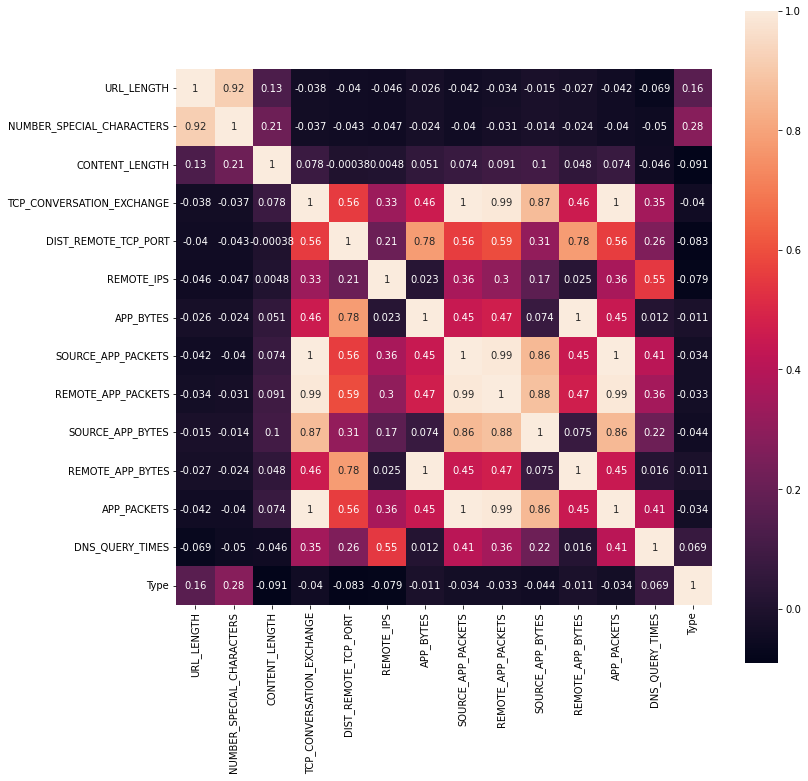

In [7]:
# Your comment here
plt.figure(figsize=(12, 12))
sns.heatmap(websites.corr(), square=True, annot=True)
plt.show()

*There is excessively high collinearity (99-100%):*
- between TCP_CONVERSATION_EXCHANGE and the following features : REMOTE_APP_PACKETS, SOURCE_APP_PACKETS, APP_PACKETS
- between APP_BYTES and REMOTE_APP_BYTES

*These features are probably simply defined by each other, in which case it is not useful to keep them all.*

# Challenge 2 - Remove Column Collinearity.

From the heatmap you created, you should have seen at least 3 columns that can be removed due to high collinearity. Remove these columns from the dataset.

Note that you should remove as few columns as you can. You don't have to remove all the columns at once. But instead, try removing one column, then produce the heatmap again to determine if additional columns should be removed. As long as the dataset no longer contains columns that are correlated for over 90%, you can stop. Also, keep in mind when two columns have high collinearity, you only need to remove one of them but not both.

In the cells below, remove as few columns as you can to eliminate the high collinearity in the dataset. Make sure to comment on your way so that the instructional team can learn about your thinking process which allows them to give feedback. At the end, print the heatmap again.

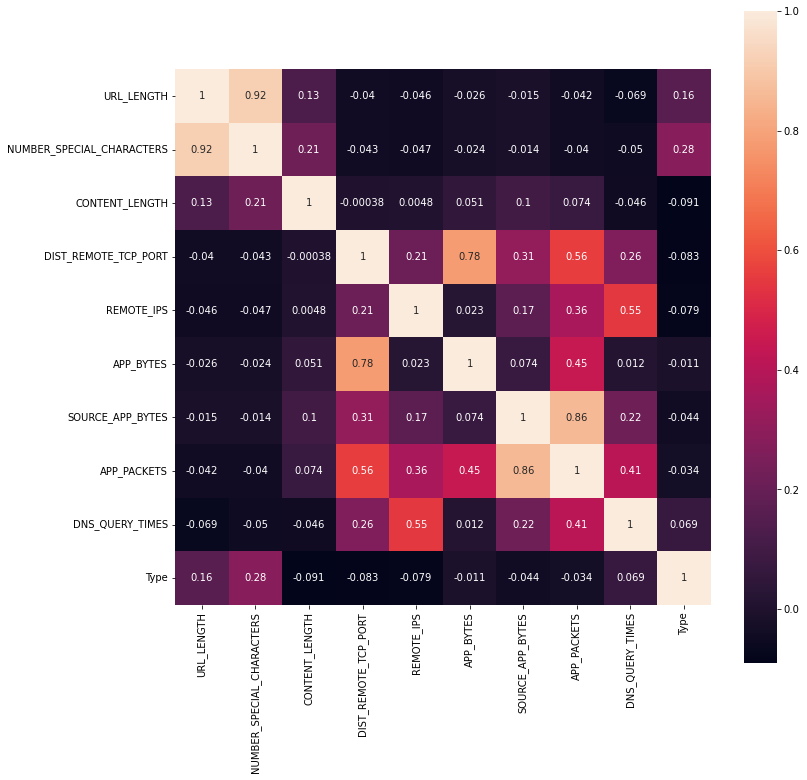

In [8]:
# Let's try removing first one column and compute the correlation heatmap again
websites.drop('TCP_CONVERSATION_EXCHANGE', axis=1, inplace=True)
websites.drop('SOURCE_APP_PACKETS', axis=1, inplace=True)
websites.drop('REMOTE_APP_BYTES', axis=1, inplace=True)
websites.drop('REMOTE_APP_PACKETS', axis=1, inplace=True)

plt.figure(figsize=(12, 12))
sns.heatmap(websites.corr(), square=True, annot=True)
plt.show()

*No more values over 90%, we can stop dropping columns.*

# Challenge 3 - Handle Missing Values

The next step would be handling missing values. **We start by examining the number of missing values in each column, which you will do in the next cell.**

In [9]:
websites.isna().sum()

URL                            0
URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        0
SERVER                         1
CONTENT_LENGTH               812
WHOIS_COUNTRY                  0
WHOIS_STATEPRO                 0
WHOIS_REGDATE                  0
WHOIS_UPDATED_DATE             0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64

If you remember in the previous labs, we drop a column if the column contains a high proportion of missing values. After dropping those problematic columns, we drop the rows with missing values.

#### In the cells below, handle the missing values from the dataset. Remember to comment the rationale of your decisions.

In [10]:
# One column contains over half of missing values and 2 single rows over the 1781 contain missing value: let's drop them
websites.drop('CONTENT_LENGTH', axis=1, inplace=True)
websites.dropna(axis=0, how='any', inplace=True)

#### Again, examine the number of missing values in each column. 

If all cleaned, proceed. Otherwise, go back and do more cleaning.

In [11]:
# Checking the dataset skimmed
websites.isna().sum()

URL                          0
URL_LENGTH                   0
NUMBER_SPECIAL_CHARACTERS    0
CHARSET                      0
SERVER                       0
WHOIS_COUNTRY                0
WHOIS_STATEPRO               0
WHOIS_REGDATE                0
WHOIS_UPDATED_DATE           0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
SOURCE_APP_BYTES             0
APP_PACKETS                  0
DNS_QUERY_TIMES              0
Type                         0
dtype: int64

# Challenge 4 - Handle `WHOIS_*` Categorical Data

There are several categorical columns we need to handle. These columns are:

* `URL`
* `CHARSET`
* `SERVER`
* `WHOIS_COUNTRY`
* `WHOIS_STATEPRO`
* `WHOIS_REGDATE`
* `WHOIS_UPDATED_DATE`

How to handle string columns is always case by case. Let's start by working on `WHOIS_COUNTRY`. Your steps are:

1. List out the unique values of `WHOIS_COUNTRY`.
1. Consolidate the country values with consistent country codes. For example, the following values refer to the same country and should use consistent country code:
    * `CY` and `Cyprus`
    * `US` and `us`
    * `SE` and `se`
    * `GB`, `United Kingdom`, and `[u'GB'; u'UK']`

#### In the cells below, fix the country values as intructed above.

In [12]:
# Checking categorical columns
categorical_feature_mask = websites.dtypes==object

# And turning them into a list
categorical_cols = websites.columns[categorical_feature_mask].tolist()
categorical_cols

['URL',
 'CHARSET',
 'SERVER',
 'WHOIS_COUNTRY',
 'WHOIS_STATEPRO',
 'WHOIS_REGDATE',
 'WHOIS_UPDATED_DATE']

In [13]:
# List the column's unique values
websites['WHOIS_COUNTRY'].unique()

array(['None', 'US', 'SC', 'GB', 'UK', 'RU', 'AU', 'CA', 'PA', 'se', 'IN',
       'LU', 'TH', "[u'GB'; u'UK']", 'FR', 'NL', 'UG', 'JP', 'CN', 'SE',
       'SI', 'IL', 'ru', 'KY', 'AT', 'CZ', 'PH', 'BE', 'NO', 'TR', 'LV',
       'DE', 'ES', 'BR', 'us', 'KR', 'HK', 'UA', 'CH', 'United Kingdom',
       'BS', 'PK', 'IT', 'Cyprus', 'BY', 'AE', 'IE', 'UY', 'KG'],
      dtype=object)

In [14]:
websites['WHOIS_COUNTRY'] = websites['WHOIS_COUNTRY'].replace('Cyprus', 'CY')
websites['WHOIS_COUNTRY'] = websites['WHOIS_COUNTRY'].replace('us', 'US')
websites['WHOIS_COUNTRY'] = websites['WHOIS_COUNTRY'].replace('se', 'SE')
websites['WHOIS_COUNTRY'] = websites['WHOIS_COUNTRY'].replace('ru', 'RU')
websites['WHOIS_COUNTRY'] = websites['WHOIS_COUNTRY'].replace(['GB', 'United Kingdom', "[u'GB'; u'UK']"], 'UK')

In [15]:
websites['WHOIS_COUNTRY'].unique()

array(['None', 'US', 'SC', 'UK', 'RU', 'AU', 'CA', 'PA', 'SE', 'IN', 'LU',
       'TH', 'FR', 'NL', 'UG', 'JP', 'CN', 'SI', 'IL', 'KY', 'AT', 'CZ',
       'PH', 'BE', 'NO', 'TR', 'LV', 'DE', 'ES', 'BR', 'KR', 'HK', 'UA',
       'CH', 'BS', 'PK', 'IT', 'CY', 'BY', 'AE', 'IE', 'UY', 'KG'],
      dtype=object)

Since we have fixed the country values, can we convert this column to ordinal now?

Not yet. If you reflect on the previous labs how we handle categorical columns, you probably remember we ended up dropping a lot of those columns because there are too many unique values. Too many unique values in a column is not desirable in machine learning because it makes prediction inaccurate. But there are workarounds under certain conditions. One of the fixable conditions is:

#### If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.

The `WHOIS_COUNTRY` column happens to be this case. You can verify it by print a bar chart of the `value_counts` in the next cell to verify:

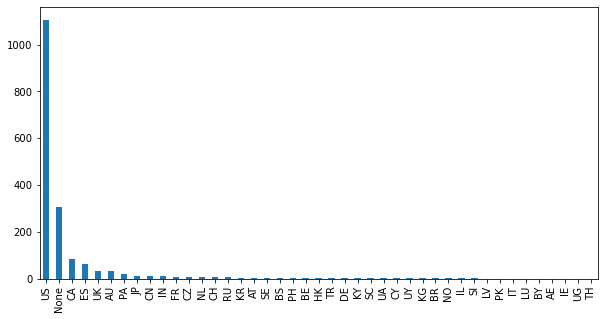

In [16]:
# Plotting the distribution of a column's value
plt.figure(figsize=(10, 5))
websites['WHOIS_COUNTRY'].value_counts().plot.bar()
plt.show()

#### After verifying, now let's keep the top 10 values of the column and re-label other columns with `OTHER`.

In [17]:
top_ten = websites['WHOIS_COUNTRY'].value_counts().sort_values(ascending=False)[0:10]
other = websites['WHOIS_COUNTRY'].value_counts().sort_values(ascending=False)[10:]

websites['WHOIS_COUNTRY'].replace(other.index.tolist(), 'OTHER', inplace=True)
websites['WHOIS_COUNTRY'].unique()

array(['None', 'US', 'OTHER', 'UK', 'AU', 'CA', 'PA', 'IN', 'JP', 'CN',
       'ES'], dtype=object)

Now since `WHOIS_COUNTRY` has been re-labelled, we don't need `WHOIS_STATEPRO` any more because the values of the states or provinces may not be relevant any more. We'll drop this column.

In addition, we will also drop `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE`. These are the registration and update dates of the website domains. Not of our concerns.

#### In the next cell, drop `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [18]:
# Dropping irrelevant columns
websites.drop(['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'], axis=1, inplace=True)
websites.columns

Index(['URL', 'URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CHARSET', 'SERVER',
       'WHOIS_COUNTRY', 'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES',
       'SOURCE_APP_BYTES', 'APP_PACKETS', 'DNS_QUERY_TIMES', 'Type'],
      dtype='object')

# Challenge 5 - Handle Remaining Categorical Data & Convert to Ordinal

Now print the `dtypes` of the data again. Besides `WHOIS_COUNTRY` which we already fixed, there should be 3 categorical columns left: `URL`, `CHARSET`, and `SERVER`.

In [19]:
# Print column dtypes
websites.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1779 entries, 0 to 1780
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        1779 non-null   object 
 1   URL_LENGTH                 1779 non-null   int64  
 2   NUMBER_SPECIAL_CHARACTERS  1779 non-null   int64  
 3   CHARSET                    1779 non-null   object 
 4   SERVER                     1779 non-null   object 
 5   WHOIS_COUNTRY              1779 non-null   object 
 6   DIST_REMOTE_TCP_PORT       1779 non-null   int64  
 7   REMOTE_IPS                 1779 non-null   int64  
 8   APP_BYTES                  1779 non-null   int64  
 9   SOURCE_APP_BYTES           1779 non-null   int64  
 10  APP_PACKETS                1779 non-null   int64  
 11  DNS_QUERY_TIMES            1779 non-null   float64
 12  Type                       1779 non-null   int64  
dtypes: float64(1), int64(8), object(4)
memory usage:

#### `URL` is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.

In [20]:
# Dropping the URL column with single values
websites.drop('URL', axis=1, inplace=True)

#### Print the unique value counts of `CHARSET`. You see there are only a few unique values. So we can keep it as it is.

In [21]:
# Unique values of Charset column
websites['CHARSET'].unique()

array(['iso-8859-1', 'UTF-8', 'us-ascii', 'ISO-8859-1', 'utf-8', 'None',
       'windows-1251', 'ISO-8859', 'windows-1252'], dtype=object)

`SERVER` is a little more complicated. Print its unique values and think about how you can consolidate those values.

#### Before you think of your own solution, don't read the instructions that come next.

In [22]:
# Looking at unique values of this column
websites['SERVER'].nunique()

239

In [23]:
# this column has much more unique values: grouping them by str.startswith could be one option
websites['SERVER'].unique()

array(['nginx', 'Apache/2.4.10', 'Microsoft-HTTPAPI/2.0', 'None',
       'Apache/2', 'nginx/1.10.1', 'Apache', 'Apache/2.2.15 (Red Hat)',
       'Apache/2.4.23 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'openresty/1.11.2.1', 'Apache/2.2.22', 'Apache/2.4.7 (Ubuntu)',
       'nginx/1.12.0',
       'Apache/2.4.12 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'Oracle-iPlanet-Web-Server/7.0', 'cloudflare-nginx', 'nginx/1.6.2',
       'openresty', 'Heptu web server', 'Pepyaka/1.11.3', 'nginx/1.8.0',
       'nginx/1.10.1 + Phusion Passenger 5.0.30',
       'Apache/2.2.29 (Amazon)', 'Microsoft-IIS/7.5', 'LiteSpeed',
       'Apache/2.4.25 (cPanel) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'tsa_c', 'Apache/2.2.0 (Fedora)', 'Apache/2.2.22 (Debian)',
       'Apache/2.2.15 (CentOS)', 'Apache/2.4.25',
       'Apache/2.4.25 (Amazon) PHP/7.0.14', 'GSE',
       'Apache/2.4.23 (Unix) OpenSSL/0.9.8e-fips-rhel5 mod_bwlimited/1.4',
       'Apache/2.4.25 (Amazon) OpenSSL/1.0.1k-fips'

Although there are so many unique values in the `SERVER` column, there are actually only 3 main server types: `Microsoft`, `Apache`, and `nginx`. Just check if each `SERVER` value contains any of those server types and re-label them. For `SERVER` values that don't contain any of those substrings, label with `Other`.

At the end, your `SERVER` column should only contain 4 unique values: `Microsoft`, `Apache`, `nginx`, and `Other`.

In [24]:
websites

URL_LENGTH  NUMBER_SPECIAL_CHARACTERS     CHARSET  \
0             16                          7  iso-8859-1   
1             16                          6       UTF-8   
2             16                          6    us-ascii   
3             17                          6  ISO-8859-1   
4             17                          6       UTF-8   
...          ...                        ...         ...   
1776         194                         16       UTF-8   
1777         198                         17       UTF-8   
1778         201                         34       utf-8   
1779         234                         34  ISO-8859-1   
1780         249                         40       utf-8   

                      SERVER WHOIS_COUNTRY  DIST_REMOTE_TCP_PORT  REMOTE_IPS  \
0                      nginx          None                     0           2   
1              Apache/2.4.10          None                     7           4   
2      Microsoft-HTTPAPI/2.0          None                     0           0   
3                      nginx            US                    22           3   
4                       None            US                     2           5   
...                      ...           ...                   ...         ...   
1776                  Apache            ES                     0           0   
1777                  Apache            ES                     0           0   
1778  Apache/2.2.16 (Debian)            US                     2           6   
1779        cloudflare-nginx            US                     0           0   
1780       Microsoft-IIS/8.5            US                     6          11   

      APP_BYTES  SOURCE_APP_BYTES  APP_PACKETS  DNS_QUERY_TIMES  Type  
0           700              1153            9              2.0     1  
1          1230              1265           17              0.0     0  
2             0                 0            0              0.0     0  
3          3812             18784           39              8.0     0  
4          4278            129889           61              4.0     0  
...         ...               ...          ...              ...   ...  
1776          0               186            0              0.0     1  
1777          0               124            0              0.0     1  
1778       6631            132181           87              4.0     0  
1779          0                 0            0              0.0     0  
1780       2314              3039           25              6.0     0  

[1779 rows x 12 columns]

In [25]:
# Relabeling `SERVER` column with 4 single values
servers = ['Microsoft', 'Apache', 'nginx']

for server in servers:
    websites.loc[websites['SERVER'].str.contains(server), 'SERVER'] = server

websites[~websites['SERVER'].isin(servers)]['SERVER'] = 'Other'

C:\Users\Shinemet\AppData\Local\Temp/ipykernel_7228/3819841518.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  websites[~websites['SERVER'].isin(servers)]['SERVER'] = 'Other'


In [26]:
# Count `SERVER` value counts here
websites['SERVER'].value_counts()

Apache                 642
nginx                  435
Microsoft              198
None                   175
Server                  49
                      ... 
mw2103.codfw.wmnet       1
barista/5.1.3            1
mw2190.codfw.wmnet       1
mw2107.codfw.wmnet       1
IdeaWebServer/v0.80      1
Name: SERVER, Length: 110, dtype: int64

OK, all our categorical data are fixed now. **Let's convert them to ordinal data using Pandas' `get_dummies` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)).** Make sure you drop the categorical columns by passing `drop_first=True` to `get_dummies` as we don't need them any more. **Also, assign the data with dummy values to a new variable `website_dummy`.**

In [27]:
# Your code here
website_dummy = pd.get_dummies(websites, drop_first=True)

Now, inspect `website_dummy` to make sure the data and types are intended - there shouldn't be any categorical columns at this point.

In [28]:
# Your code here
website_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1779 entries, 0 to 1780
Columns: 136 entries, URL_LENGTH to WHOIS_COUNTRY_US
dtypes: float64(1), int64(8), uint8(127)
memory usage: 359.6 KB


# Challenge 6 - Modeling, Prediction, and Evaluation

We'll start off this section by splitting the data to train and test. **Name your 4 variables `X_train`, `X_test`, `y_train`, and `y_test`. Select 80% of the data for training and 20% for testing.**

In [29]:
# Split the dataset into independent features (X) and target (y)
X = website_dummy.drop('Type', axis=1)
y = website_dummy['Type']

print(X.shape)
print(y.shape)

(1779, 135)
(1779,)


In [30]:
from sklearn.model_selection import train_test_split

# Your code here:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

#### In this lab, we will try two different models and compare our results.

The first model we will use in this lab is logistic regression. We have previously learned about logistic regression as a classification algorithm. In the cell below, load `LogisticRegression` from scikit-learn and initialize the model.

In [31]:
# First standardize the data to use LR
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [32]:
# Initialize LR model
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42, solver='lbfgs', multi_class='auto')

Next, fit the model to our training data. We have already separated our data into 4 parts. Use those in your model.

In [33]:
# Fit model
lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

finally, import `confusion_matrix` and `accuracy_score` from `sklearn.metrics` and fit our testing data. Assign the fitted data to `y_pred` and print the confusion matrix as well as the accuracy score

The accuracy of the Logistic Regression is: 93.25842696629213 %

The classification report for Logistic Regression is:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       315
           1       0.90      0.46      0.61        41

    accuracy                           0.93       356
   macro avg       0.92      0.73      0.79       356
weighted avg       0.93      0.93      0.92       356



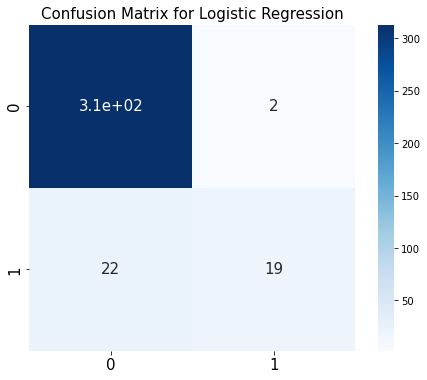

In [34]:
# Compute confusion matrix and accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

def generate_results(model, predictions, name):
    cl_rep = classification_report(y_test, predictions)
    print("\nThe classification report for " + name + " is:", cl_rep, sep = "\n")
    cm_model = confusion_matrix(y_test, predictions)
    plt.figure(figsize = (8, 6))
    sns.heatmap(cm_model, annot = True, cmap = 'Blues', annot_kws = {'size': 15}, square = True)
    plt.title('Confusion Matrix for ' + name, size = 15)
    plt.xticks(size = 15)
    plt.yticks(size = 15)
    plt.show()
    
y_pred = lr.predict(X_test)
# Predict probabilities
probs_y=lr.predict_proba(X_test)
### Print results 
probs_y = np.round(probs_y, 2)

print('The accuracy of the Logistic Regression is:', lr.score(X_test, y_test) * 100, '%')
generate_results(lr, y_pred, 'Logistic Regression')

In [43]:
# Another simpler way to do it
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_pred = lr.predict(X_test)
probs_y=lr.predict_proba(X_test)
probs_y = np.round(probs_y, 2)

print(lr.score(X_test, y_test) * 100, '%')

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

93.25842696629213 %
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       315
           1       0.90      0.46      0.61        41

    accuracy                           0.93       356
   macro avg       0.92      0.73      0.79       356
weighted avg       0.93      0.93      0.92       356

[[313   2]
 [ 22  19]]


What are your thoughts on the performance of the model? Write your conclusions below.

*The accuracy of 93% is a good score but there are still a lot of false values.*

#### Our second algorithm is is K-Nearest Neighbors. 

Though is it not required, we will fit a model using the training data and then test the performance of the model using the testing data. Start by loading `KNeighborsClassifier` from scikit-learn and then initializing and fitting the model. We'll start off with a model where k=3.

In [52]:
# Split the dataset with Kfold
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold()
skf.get_n_splits(X, y)
print(skf)

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)


In [50]:
for train_index, test_index in skf.split(X, y):
    print(train_index.shape)
    print(test_index.shape)

(1423,)
(356,)
(1423,)
(356,)
(1423,)
(356,)
(1423,)
(356,)
(1424,)
(355,)


------------- 1 -------------------
[[304  11]
 [ 12  29]]
------------- 2 -------------------
[[312   3]
 [ 15  26]]
------------- 3 -------------------
[[308   7]
 [ 12  29]]
------------- 4 -------------------
[[311   4]
 [ 15  26]]
------------- 5 -------------------
[[309   6]
 [ 12  29]]
------------- 6 -------------------
[[312   3]
 [ 15  26]]
------------- 7 -------------------
[[311   4]
 [ 15  26]]
------------- 8 -------------------
[[313   2]
 [ 18  23]]
------------- 9 -------------------
[[309   6]
 [ 18  23]]
------------- 10 -------------------
[[312   3]
 [ 20  21]]
------------- 11 -------------------
[[306   9]
 [ 18  23]]
------------- 12 -------------------
[[307   8]
 [ 18  23]]
------------- 13 -------------------
[[303  12]
 [ 18  23]]
------------- 14 -------------------
[[306   9]
 [ 22  19]]
------------- 15 -------------------
[[304  11]
 [ 19  22]]
------------- 16 -------------------
[[305  10]
 [ 23  18]]
------------- 17 -------------------
[[304  11]
 

[[315   0]
 [ 41   0]]
------------- 144 -------------------
[[315   0]
 [ 41   0]]
------------- 145 -------------------
[[315   0]
 [ 41   0]]
------------- 146 -------------------
[[315   0]
 [ 41   0]]
------------- 147 -------------------
[[315   0]
 [ 41   0]]
------------- 148 -------------------
[[315   0]
 [ 41   0]]
------------- 149 -------------------
[[315   0]
 [ 41   0]]
------------- 150 -------------------
[[315   0]
 [ 41   0]]
------------- 151 -------------------
[[315   0]
 [ 41   0]]
------------- 152 -------------------
[[315   0]
 [ 41   0]]
------------- 153 -------------------
[[315   0]
 [ 41   0]]
------------- 154 -------------------
[[315   0]
 [ 41   0]]
------------- 155 -------------------
[[315   0]
 [ 41   0]]
------------- 156 -------------------
[[315   0]
 [ 41   0]]
------------- 157 -------------------
[[315   0]
 [ 41   0]]
------------- 158 -------------------
[[315   0]
 [ 41   0]]
------------- 159 -------------------
[[315   0]
 [ 41   0]]
-

------------- 282 -------------------
[[315   0]
 [ 41   0]]
------------- 283 -------------------
[[315   0]
 [ 41   0]]
------------- 284 -------------------
[[315   0]
 [ 41   0]]
------------- 285 -------------------
[[315   0]
 [ 41   0]]
------------- 286 -------------------
[[315   0]
 [ 41   0]]
------------- 287 -------------------
[[315   0]
 [ 41   0]]
------------- 288 -------------------
[[315   0]
 [ 41   0]]
------------- 289 -------------------
[[315   0]
 [ 41   0]]
------------- 290 -------------------
[[315   0]
 [ 41   0]]
------------- 291 -------------------
[[315   0]
 [ 41   0]]
------------- 292 -------------------
[[315   0]
 [ 41   0]]
------------- 293 -------------------
[[315   0]
 [ 41   0]]
------------- 294 -------------------
[[315   0]
 [ 41   0]]
------------- 295 -------------------
[[315   0]
 [ 41   0]]
------------- 296 -------------------
[[315   0]
 [ 41   0]]
------------- 297 -------------------
[[315   0]
 [ 41   0]]
------------- 298 ------

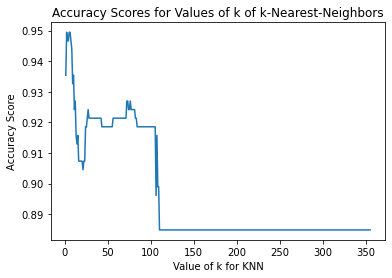

In [54]:
from sklearn.neighbors import KNeighborsClassifier

k_range = list(range(1,356))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    print ('-------------', k, '-------------------')
    print(metrics.confusion_matrix(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

For k=3:
Accuracy score is 0.9466292134831461
[[308   7]
 [ 12  29]]


To test your model, compute the predicted values for the testing sample and print the confusion matrix as well as the accuracy score.

In [71]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('The accuracy of the K-nearest Neighbors model with k=3 is', metrics.accuracy_score(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

The accuracy of the K-nearest Neighbors model with k=3 is 0.9466292134831461
[[308   7]
 [ 12  29]]


#### We'll create another K-Nearest Neighbors model with k=5. 

Initialize and fit the model below and print the confusion matrix and the accuracy score.

In [72]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('The accuracy of the K-nearest Neighbors model with k=5 is', metrics.accuracy_score(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

The accuracy of the K-nearest Neighbors model with k=5 is 0.949438202247191
[[309   6]
 [ 12  29]]


Did you see an improvement in the confusion matrix when increasing k to 5? Did you see an improvement in the accuracy score? Write your conclusions below.

*Increasing k from 3 to 5 increased both accuracy score and the overall result of my confusion matrix: k-neighboring model with 5 fits best on my dataset.*

#### Please implement decision tree, random forest, SVM and extra tree. Which model is better? 

In [73]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

tree = DecisionTreeClassifier(max_depth = 3, random_state = 1)
tree.fit(X_train,y_train)
prediction=tree.predict(X_test)

print("The accuracy of the Decision Tree is","{:.3f}".format(metrics.accuracy_score(prediction,y_test)))

The accuracy of the Decision Tree is 0.919


In [85]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(3)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
acc_rfc = rfc.score(X_test, y_test)

print('The accuracy of the Random Forest Classifier is', acc_rfc)

The accuracy of the Random Forest Classifier is 0.9410112359550562


In [81]:
from sklearn import svm

clf = svm.SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('The accuracy of the Support Vector Machines is', metrics.accuracy_score(y_test, y_pred))

The accuracy of the Support Vector Machines is 0.9185393258426966


In [89]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score

clf = ExtraTreesClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

cv_scores = cross_val_score(clf, X_train, y_train, cv=5)
print("CV average score: %.3f" % cv_scores.mean())

print('The accuracy of the ExtraTreesClassifier is', metrics.accuracy_score(y_pred, y_test))

CV average score: 0.961
The accuracy of the ExtraTreesClassifier is 0.9550561797752809


*The best model for my dataset is Random Forest.*

# Bonus Challenge - Feature Scaling

Problem-solving in machine learning is iterative. You can improve your model prediction with various techniques (there is a sweetspot for the time you spend and the improvement you receive though). Now you've completed only one iteration of ML analysis. There are more iterations you can conduct to make improvements. In order to be able to do that, you will need deeper knowledge in statistics and master more data analysis techniques. In this bootcamp, we don't have time to achieve that advanced goal. But you will make constant efforts after the bootcamp to eventually get there.

However, now we do want you to learn one of the advanced techniques which is called *feature scaling*. The idea of feature scaling is to standardize/normalize the range of independent variables or features of the data. This can make the outliers more apparent so that you can remove them. This step needs to happen during Challenge 6 after you split the training and test data because you don't want to split the data again which makes it impossible to compare your results with and without feature scaling. For general concepts about feature scaling, click [here](https://en.wikipedia.org/wiki/Feature_scaling). To read deeper, click [here](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

In the next cell, attempt to improve your model prediction accuracy by means of feature scaling. A library you can utilize is `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). You'll use the `RobustScaler` to fit and transform your `X_train`, then transform `X_test`. You will use logistic regression to fit and predict your transformed data and obtain the accuracy score in the same way. Compare the accuracy score with your normalized data with the previous accuracy data. Is there an improvement?

In [39]:
# Your code here